In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import PercentFormatter
import random

# A)    Calculating recall and precision values for all relevant documents and drawing precision VS Recall Curve. Also finding R-precision.

In [2]:
def precision_vs_recall(Rq,Aq):
    pvr = {}
    R_precision = 0
    r,lRq = 0,len(Rq) # r denotes number of relevant documents obtained 
    pvr["doc"] = []
    pvr["recall"] = []
    pvr["precision"] = []
    for i in range(len(Aq)):
        item = Aq[i]
        if item in Rq:
            pvr["doc"].append(item)
            r+=1
            pvr["recall"].append(r/lRq)
            pvr["precision"].append(r/(i+1))
        if i+1==lRq:
            R_precision = len(pvr["precision"])/lRq
    return pvr,R_precision

def print_result(data):
    df = pd.DataFrame(data)
    df = df.set_index(df.columns[0])
    print(df)
    return df

def get_precision_at_standard_11_recall_levels(data):
    
    recall = [0]
    precision = [data["precision"][0]]

    for i in np.arange(0.1,1.1,0.1):
        
        i = round(i,1)
        
        recall.append(i)
        if len(data["recall"])==0:
            precision.append(0)
        
        else:
            if data["recall"][0]>i:
                precision.append(data["precision"][0])
                
            elif data["recall"][0]==i:
                precision.append(data["precision"][0])
                data["recall"].pop(0)
                data["precision"].pop(0)
                
            else:
                data["recall"].pop(0)
                data["precision"].pop(0)
                precision.append(data["precision"][0])
           
    return recall,precision
    
    
def plot_graph(recall,precision):
    plt.plot(recall,precision,"bo-")
    plt.xlim(0,1.2)
    plt.ylim(0,1.2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision at 11 standard recall levels")
    plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.show()

# Instance 1

In [3]:
Rq_1=["d3","d5","d9","d25","d39","d44","d56","d71","d89","d123"]
Aq_1=["d123","d84","d56","d6","d8","d9","d511","d129","d187","d25","d38","d48","d250","d113","d3"]

In [4]:
res_pvr,r_precision = precision_vs_recall(Rq_1,Aq_1) 
result = print_result(res_pvr)

      recall  precision
doc                    
d123     0.1   1.000000
d56      0.2   0.666667
d9       0.3   0.500000
d25      0.4   0.400000
d3       0.5   0.333333


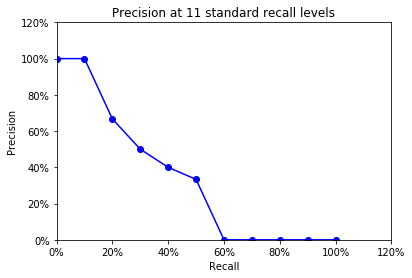

In [5]:
recall,precision = get_precision_at_standard_11_recall_levels(res_pvr)      
plot_graph(recall,precision)

In [6]:
print("R-Precision : ",r_precision)

R-Precision :  0.4


# Instance 2

In [7]:
Rq_2=["d3","d56","d129"]
Aq_2=["d123","d84","d56","d6","d8","d9","d511","d129","d187","d25","d38","d48","d250","d113","d3"]

In [8]:
res_pvr_1,r_precision_1 = precision_vs_recall(Rq_2,Aq_2) 
result_1 = print_result(res_pvr_1)

        recall  precision
doc                      
d56   0.333333   0.333333
d129  0.666667   0.250000
d3    1.000000   0.200000


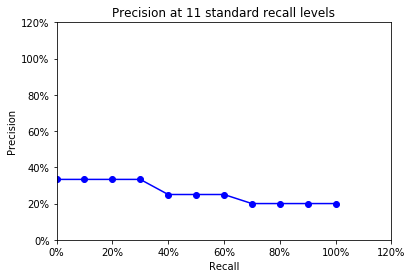

In [9]:
recall,precision = get_precision_at_standard_11_recall_levels(res_pvr_1)
plot_graph(recall,precision)

In [10]:
print("R-Precision : ",r_precision_1)

R-Precision :  0.3333333333333333


# B) Comparing two algorithms for the same query q

In [11]:
def get_r_precision(Rq,Aq):
    r_prec = []
    for rq,aq in zip(Rq,Aq):
        counter = 0
        len_rq = len(rq)
        for i in range(len_rq):
            item = aq[i]
            if item in rq:
                counter+=1
        r_prec.append(counter/len_rq)
    return r_prec

In [12]:
docs = ["d"+str(i) for i in range(1,21)]

Rq_for_10_queries, Aq_for_algo_A, Aq_for_algo_B = [],[],[]

# Generating n relavent documents for a given query
for _ in range(10):
    n = random.randint(8,12)
    li = random.sample(docs,n)
    Rq_for_10_queries.append(li)
    
# Generating n documents retrieved by Algoritm A for a given query
for _ in range(10):
    n = random.randint(13,18)
    li = random.sample(docs,n)
    Aq_for_algo_A.append(li)
    
# Generating n documents retrieved by Algoritm B for a given query
for _ in range(10):
    n = random.randint(13,18)
    li = random.sample(docs,n)
    Aq_for_algo_B.append(li)
    
qno = list(range(1,11))

In [13]:
RP_A = get_r_precision(Rq_for_10_queries,Aq_for_algo_A)
RP_B = get_r_precision(Rq_for_10_queries,Aq_for_algo_B)
RP_AB = [A-B for A,B in zip(RP_A,RP_B)]

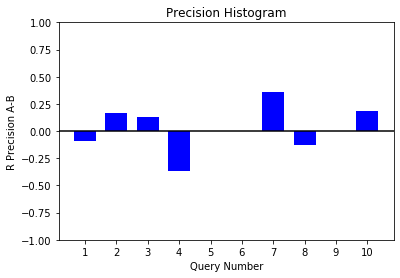

In [14]:
plt.bar(qno,RP_AB,color="blue",width=0.7)
plt.xticks(qno)
plt.axhline(y = 0, color="black",linestyle = '-')
plt.xlabel("Query Number")
plt.ylabel("R Precision A-B")
plt.title("Precision Histogram")
plt.ylim(-1,1)
plt.show()

# C) Calculating Harmonic mean and E - measure for all 3 cases

In [15]:
def harmonic_mean(data):
    F = 2/(1/data["recall"]+1/data["precision"])
    return F

def e_measure(data,b):
    E = 1-((1+b**2)/(b**2/data["recall"] + 1/data["precision"]))
    return E 

# Instance 1

In [16]:
res_copy = result.copy()
result["harmonic_mean"] = harmonic_mean(res_copy)
result["e_measure(b=1)"] = e_measure(res_copy,1) #b=1
result["e_measure(b=2)"] = e_measure(res_copy,2) #b>1
result["e_measure(b=0.5)"] = e_measure(res_copy,0.5) #b<1

In [17]:
result

,recall,precision,harmonic_mean,e_measure(b=1),e_measure(b=2),e_measure(b=0.5)
doc,,,,,,
d123,0.1,1.000000,0.181818,0.818182,0.878049,0.642857
d56,0.2,0.666667,0.307692,0.692308,0.767442,0.545455
d9,0.3,0.500000,0.375000,0.625000,0.673913,0.558824
d25,0.4,0.400000,0.400000,0.600000,0.600000,0.600000
d3,0.5,0.333333,0.400000,0.600000,0.545455,0.642857


# Instance 2

In [18]:
res_copy = result_1.copy()
result_1["harmonic_mean"] = harmonic_mean(res_copy)
result_1["e_measure(b=1)"] = e_measure(res_copy,1)
result_1["e_measure(b=2)"] = e_measure(res_copy,2)
result_1["e_measure(b=0.5)"] = e_measure(res_copy,0.5)

In [19]:
result_1

,recall,precision,harmonic_mean,e_measure(b=1),e_measure(b=2),e_measure(b=0.5)
doc,,,,,,
d56,0.333333,0.333333,0.333333,0.666667,0.666667,0.666667
d129,0.666667,0.250000,0.363636,0.636364,0.500000,0.714286
d3,1.000000,0.200000,0.333333,0.666667,0.444444,0.761905
